In [1]:
# Dependencies
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# Data Repository
from ucimlrepo import fetch_ucirepo 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

In [2]:
trees = {
    'Geometry Mean': ['radius1', 'compactness1', 'concavity1', 'symmetry1', 'smoothness1'],
    'Geometry Worst': ['radius3', 'compactness3', 'concavity3', 'symmetry3', 'smoothness3'],
    'Texture Mean': ['texture1', 'fractal_dimension1', 'smoothness1', 'symmetry1'],
}

print(f'{"Model":<20} {"Mean CV Acc":>12} {"Std":>8}')
print('-' * 42)

for name, features in trees.items():
    clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4)
    scores = cross_val_score(clf, X[features], y['Diagnosis'], cv=10, scoring='accuracy')
    print(f'{name:<20} {scores.mean():>12.4f} {scores.std():>8.4f}')

Model                 Mean CV Acc      Std
------------------------------------------
Geometry Mean              0.9280   0.0287
Geometry Worst             0.9315   0.0241
Texture Mean               0.7557   0.0591


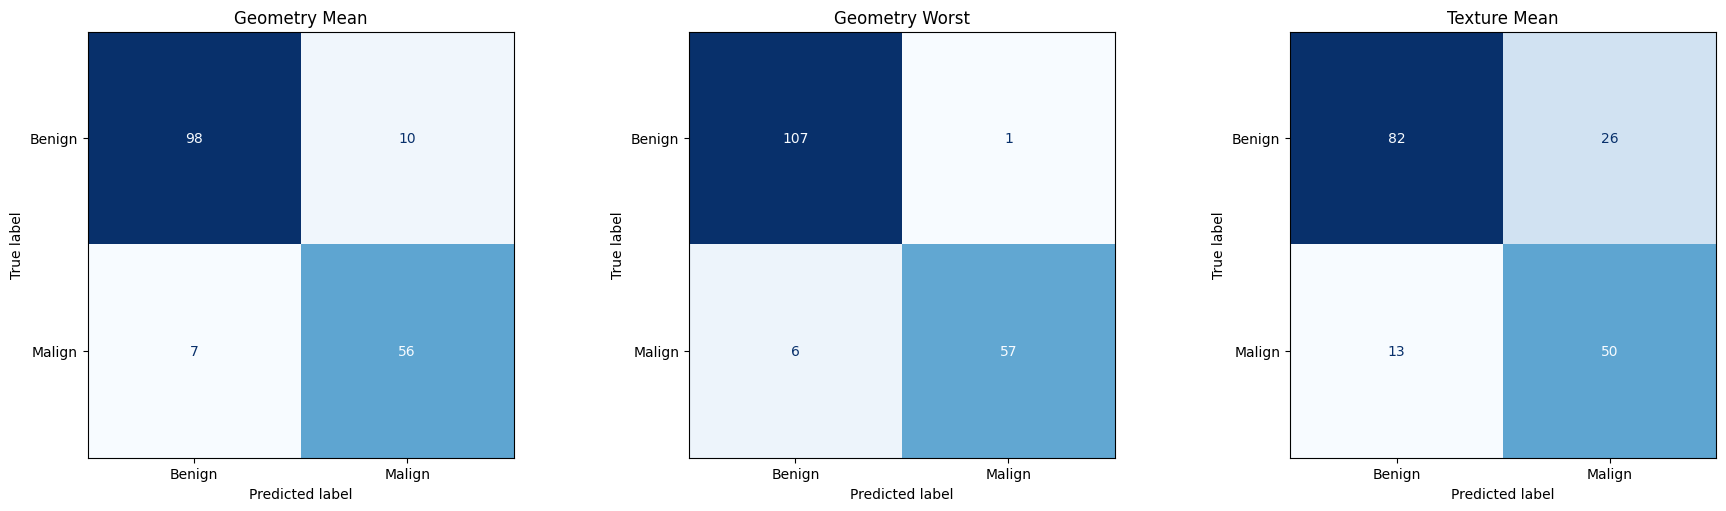

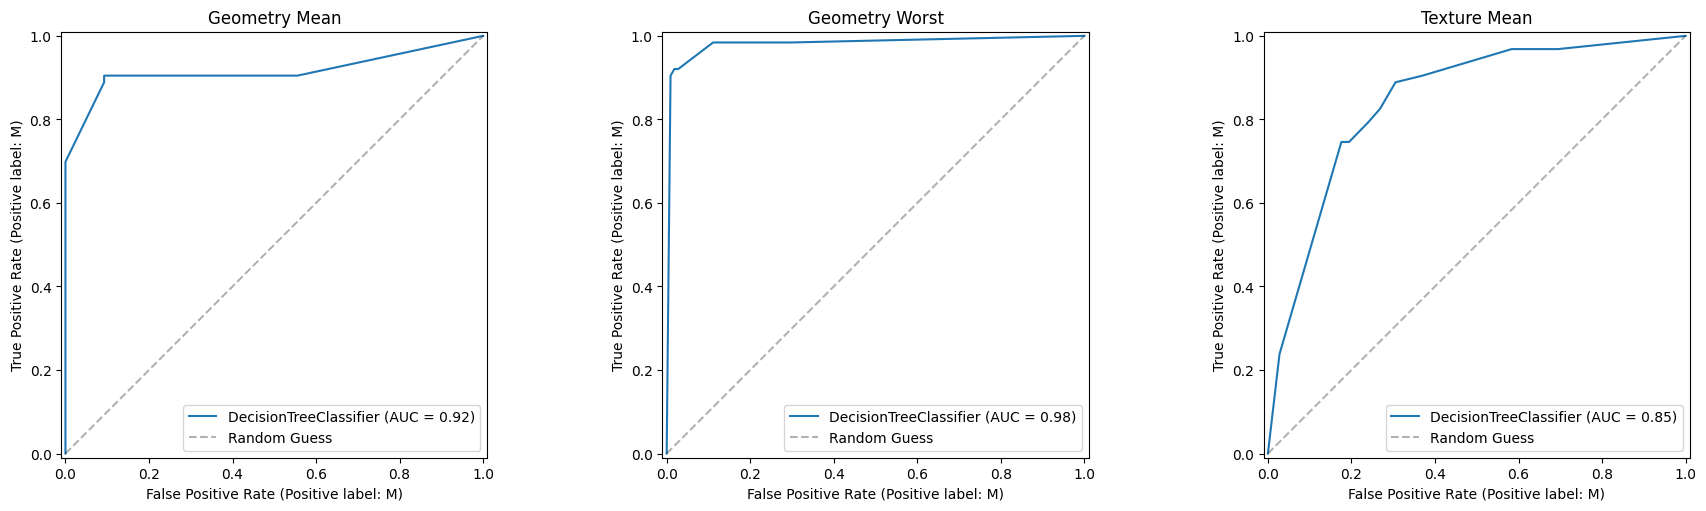

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), layout="constrained")

trained_models = {}

for idx, (name, features) in enumerate(trees.items()):
    X_selected = X[features]
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y['Diagnosis'], test_size=0.3, random_state=42
    )

    clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    trained_models[name] = (clf, X_test, y_test, features)

    cm = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malign'])
    disp.plot(ax=axs[idx], cmap='Blues', colorbar=False)
    axs[idx].set_title(name)

plt.show()

fig, axs = plt.subplots(1, 3, figsize=(18, 5), layout="constrained")

for idx, (name, (clf, X_test, y_test, features)) in enumerate(trained_models.items()):
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=axs[idx])
    axs[idx].set_title(name)
    axs[idx].plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Random Guess')
    axs[idx].legend(loc='lower right')

plt.show()